# Clustering

- Imports 

In [3]:
import numpy as np
import pandas as pd

from ml_lib.clustering import KMeans, elbow_method
from ml_lib.preprocessing import Pipeline,StandardScaler,SimpleImputer



Load the data


In [4]:
df=pd.read_csv(r"C:/project/datasets/unsupervised_data.csv")

print(df)

          ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6
0          1 -21.904591 -22.659091  12.805995 -46.631935 -34.347081 -21.989738
1          2 -28.662385  68.757081  31.761821   3.982259 -62.876866 -61.838563
2          3 -62.551204  60.909235   8.112918  24.110050 -64.372336  70.681940
3          4  14.428024 -48.326045 -65.576518  76.027549  69.966852  48.023953
4          5   9.780285 -55.643172 -72.737299  74.180123  67.873327  41.128015
...      ...        ...        ...        ...        ...        ...        ...
39995  39996  19.126649 -53.397074 -73.297148  69.415535  75.729247  54.485823
39996  39997  -3.768855 -32.785832  22.813179 -50.865346 -36.385833 -28.710921
39997  39998 -10.519365  51.354702 -45.129637   1.941843  13.162370 -77.770009
39998  39999  47.122315 -47.272906 -47.184628 -52.908391 -29.804291   2.042820
39999  40000 -12.183319  52.257030 -42.015432  14.206545   0.706092 -77.297272

[40000 rows x 7 columns]


- Preprocesses the DAta

In [5]:
X= df.iloc[:,1:]
pipe=Pipeline([
   ( 'imputer',SimpleImputer(strategy="mean")),
   ('scaler',StandardScaler())

])
X= pipe.fit(X)



- Choose the value of k by elbow method let be equal to best_k by choosing the elbow value

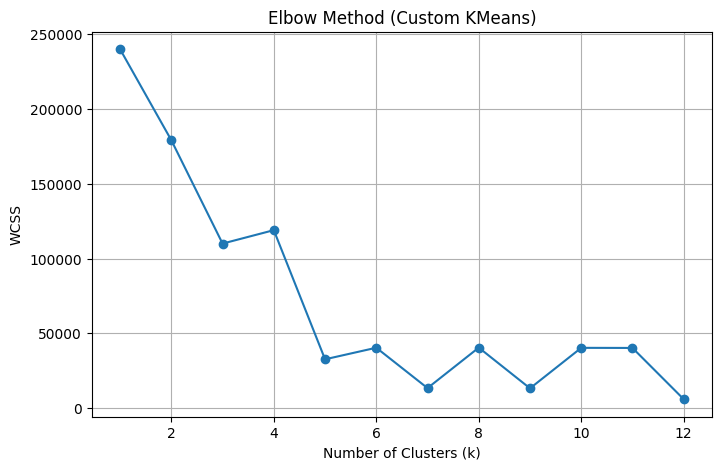

In [6]:
wcss= elbow_method(X,max_k=12)

### Make the model

In [7]:
best_k=5

model=KMeans(n_clusters=5,max_iters=200)
clusters=model.fit(X)


export as csv

In [ ]:
id=df['ID'].values
print(id.shape,id)
df1=pd.DataFrame({
    'id':id,
    'target':clusters
})

df1.to_csv("C:/project/datasets/processed/unsupervised_clustering_pred.csv",index=False)

(40000,) [    1     2     3 ... 39998 39999 40000]
